### Loading libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plot
import sympy as sm
import math

###  Implement Quadratic Equation and Derivative for Function Relu

In [2]:
class Function_Relu :
    
    def get_quadratic_equation_value(self, x) : 
        value = max(x,0)
        return value
    
    def get_quadratic_equation_derivative_value(self, x) : 
        derivative_x_value = np.heaviside(x, 0)
        return derivative_x_value
    

In [3]:
relu_test = Function_Relu()
test_function_value = relu_test.get_quadratic_equation_value(-1)
print(f'Relu Function value for x = -1 is: {test_function_value}')

test_function_derivative_value_x = relu_test.get_quadratic_equation_derivative_value(-1)
print(f'Relu Function derivative for x = -1 is: {test_function_derivative_value_x}')

relu_test = Function_Relu()
test_function_value = relu_test.get_quadratic_equation_value(3)
print(f'Relu Function value for x = 3 is: {test_function_value}')

test_function_derivative_value_x = relu_test.get_quadratic_equation_derivative_value(3)
print(f'Relu Function derivative for x = 3 is: {test_function_derivative_value_x}')

Relu Function value for x = -1 is: 0
Relu Function derivative for x = -1 is: 0.0
Relu Function value for x = 3 is: 3
Relu Function derivative for x = 3 is: 1.0


### RMSProp Gradient Descent

In [4]:
def execute_rmsprop_gradient_descent(function_object, starting_point_x = 1, alpha = 1, beta = 1, num_iterations = 50) : 
    
    x_point = starting_point_x
    x_values = np.array([starting_point_x])
    function_values = np.array([function_object.get_quadratic_equation_value(starting_point_x)])
    epsilon = 1e-8
    
    x_alpha = alpha
    x_sum = 0
    
    for _ in range(num_iterations) : 
        
        derivative_x_value = function_object.get_quadratic_equation_derivative_value(x_point)
        x_sum = (x_sum * beta) + ((1 - beta) * ((derivative_x_value) ** 2))
        
        x_alpha = alpha / (math.sqrt(x_sum) + epsilon)
        
        x_point = x_point - (x_alpha * derivative_x_value)
        
        x_values = np.append(x_values, [x_point], axis = 0)
        function_values = np.append(function_values, [function_object.get_quadratic_equation_value(x_point)])
        
    return x_values, function_values

### Heavy Ball Gradient Descent

In [5]:
def execute_heavyball_gradient_descent(function_object, starting_point_x = 1, alpha = 1, beta = 1, num_iterations = 50) : 
    
    x_point = starting_point_x
    x_values = np.array([starting_point_x])
    function_values = np.array([function_object.get_quadratic_equation_value(starting_point_x)])
    epsilon = 1e-8
    
    x_z = 0
    
    for _ in range(num_iterations) : 
        
        derivative_x_value = function_object.get_quadratic_equation_derivative_value(x_point)
        x_z = (x_z * beta) + (alpha * derivative_x_value)
        
        x_point = x_point - x_z
        
        x_values = np.append(x_values, [x_point], axis = 0)
        function_values = np.append(function_values, [function_object.get_quadratic_equation_value(x_point)])
        
    return x_values, function_values

### Adam Gradient Descent

In [6]:
def execute_adam_gradient_descent(function_object, starting_point_x = 1, alpha = 1, beta_1 = 1, beta_2 = 1, num_iterations = 50) : 
    
    x_point = starting_point_x
    x_values = np.array([starting_point_x])
    function_values = np.array([function_object.get_quadratic_equation_value(starting_point_x)])
    epsilon = 1e-8
    
    x_v = 0
    x_m = 0
    
    for i in range(num_iterations) : 
        
        derivative_x_value = function_object.get_quadratic_equation_derivative_value(x_point)
        
        x_m = (x_m * beta_1) + ((1 - beta_1) * derivative_x_value)
        
        x_v = (x_v * beta_2) + ((1 - beta_2) * ((derivative_x_value) ** 2))
        
        x_m_hat = x_m / (1 - ((beta_1) ** (i + 1)))
        
        x_v_hat = x_v / (1 - ((beta_2) ** (i + 1)))                 
        
        x_alpha = x_m_hat / (math.sqrt(x_v_hat) + epsilon)
        
        x_point = x_point - (x_alpha * alpha)
        
        x_values = np.append(x_values, [x_point], axis = 0)
        
        function_values = np.append(function_values, [function_object.get_quadratic_equation_value(x_point)])
        
    return x_values, function_values

### Question c(i): Relu for initial condition x = −1

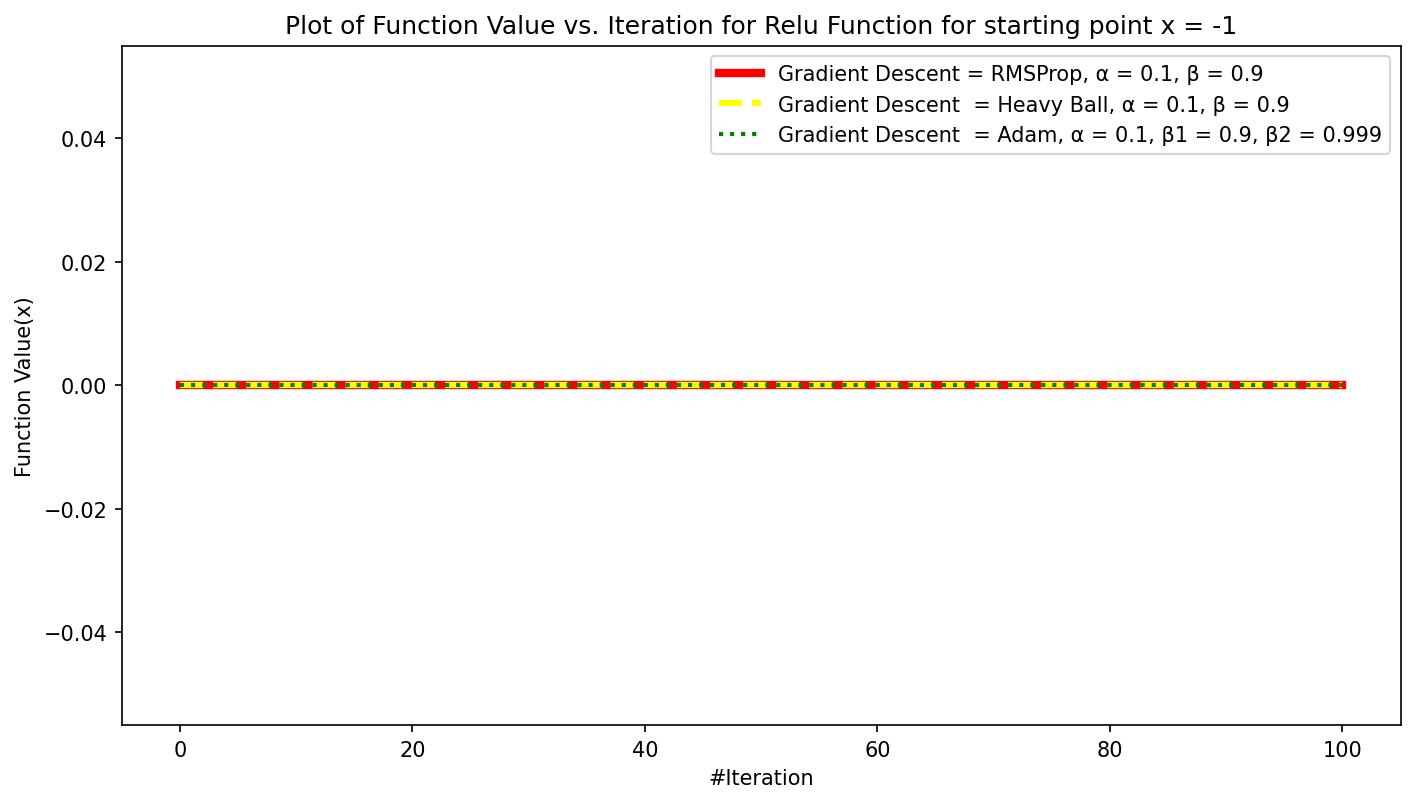

In [7]:
x = -1
plot.figure(figsize=(11, 6), dpi=150)
relu = Function_Relu()

x_values, function_values = execute_rmsprop_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta = 0.9, num_iterations = 100)
plot.plot(function_values, lw = 4, color = 'red', label = 'Gradient Descent = RMSProp, α = 0.1, β = 0.9')

x_values, function_values = execute_heavyball_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta = 0.9, num_iterations = 100)
plot.plot(function_values, lw = 3, color = 'yellow', linestyle='dashed', label = 'Gradient Descent  = Heavy Ball, α = 0.1, β = 0.9')

x_values, function_values = execute_adam_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta_1 = 0.9, beta_2 = 0.999, num_iterations = 100)
plot.plot(function_values, lw = 2, color = 'green', linestyle='dotted', label = 'Gradient Descent  = Adam, α = 0.1, β1 = 0.9, β2 = 0.999')


plot.xlabel('#Iteration')
plot.ylabel('Function Value(x)')
plot.title(f'Plot of Function Value vs. Iteration for Relu Function for starting point x = {x}') 

plot.legend()
plot.show()



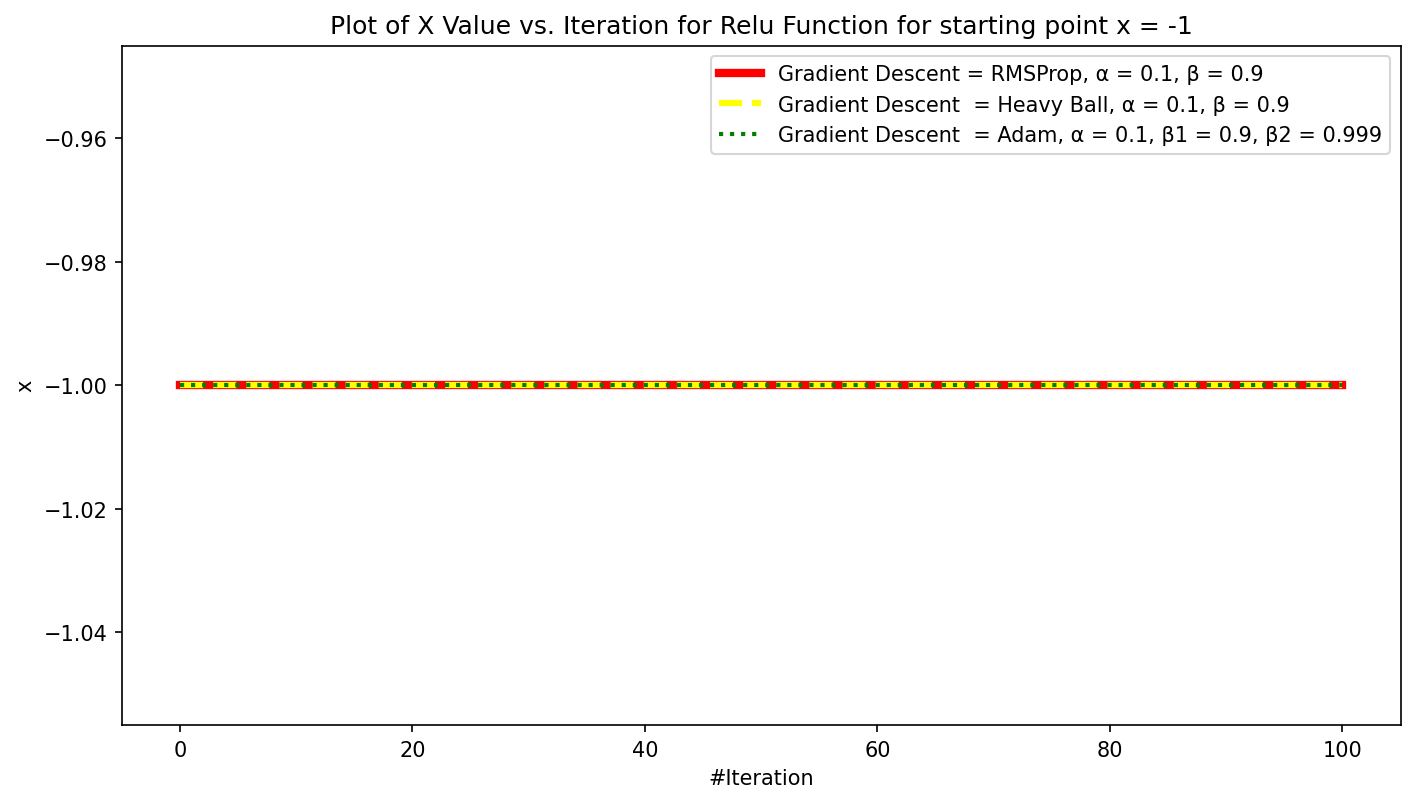

In [8]:
x = -1
plot.figure(figsize=(11, 6), dpi=150)
relu = Function_Relu()

x_values, function_values = execute_rmsprop_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta = 0.9, num_iterations = 100)
plot.plot(x_values, lw = 4, color = 'red', label = 'Gradient Descent = RMSProp, α = 0.1, β = 0.9')

x_values, function_values = execute_heavyball_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta = 0.9, num_iterations = 100)
plot.plot(x_values, lw = 3, color = 'yellow', linestyle='dashed', label = 'Gradient Descent  = Heavy Ball, α = 0.1, β = 0.9')

x_values, function_values = execute_adam_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta_1 = 0.9, beta_2 = 0.999, num_iterations = 100)
plot.plot(x_values, lw = 2, color = 'green', linestyle='dotted', label = 'Gradient Descent  = Adam, α = 0.1, β1 = 0.9, β2 = 0.999')


plot.xlabel('#Iteration')
plot.ylabel('x')
plot.title(f'Plot of X Value vs. Iteration for Relu Function for starting point x = {x}') 

plot.legend()
plot.show()



### Question c(ii): Relu for initial condition x = +1

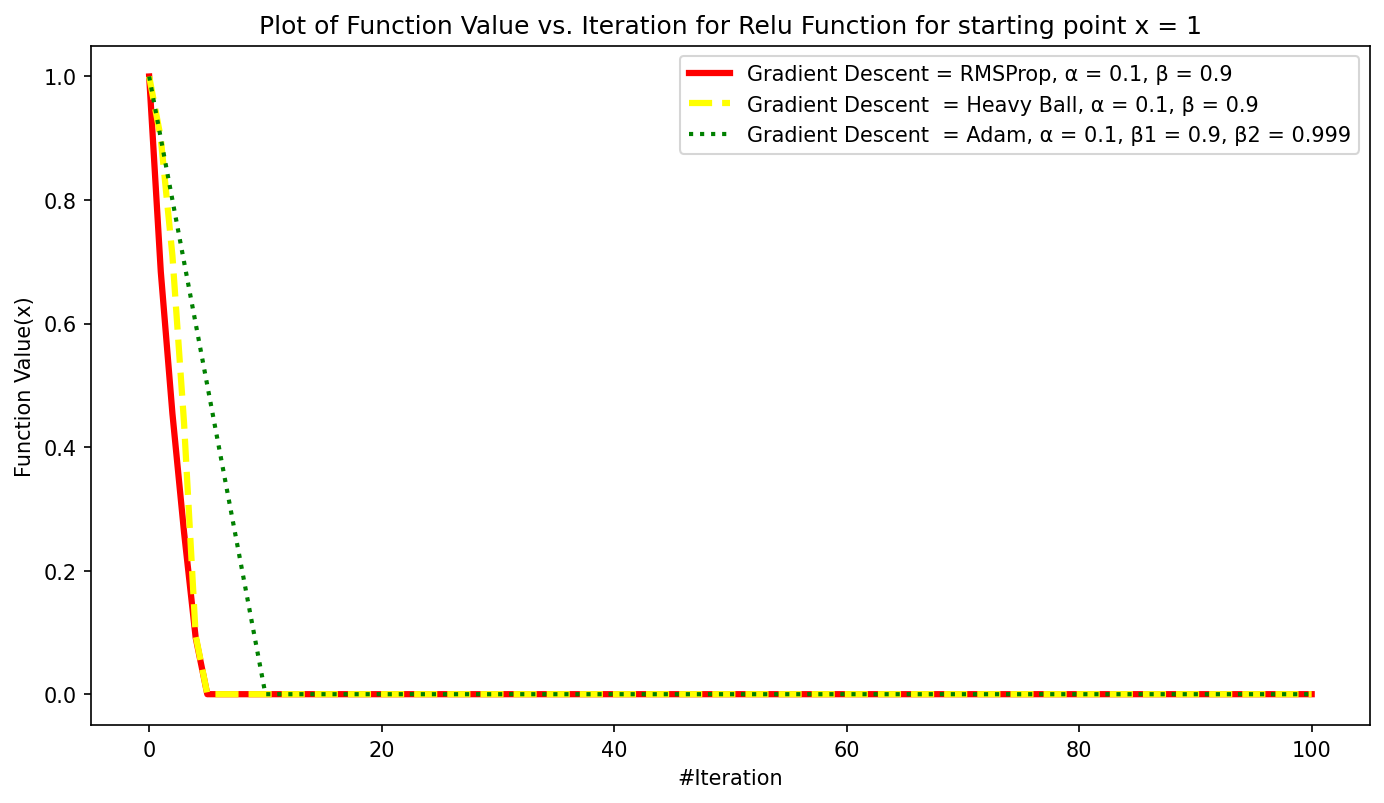

In [9]:
x = 1
plot.figure(figsize=(11, 6), dpi=150)
relu = Function_Relu()

x_values, function_values = execute_rmsprop_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta = 0.9, num_iterations = 100)
plot.plot(function_values, lw = 3, color = 'red', label = 'Gradient Descent = RMSProp, α = 0.1, β = 0.9')

x_values, function_values = execute_heavyball_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta = 0.9, num_iterations = 100)
plot.plot(function_values, lw = 3, color = 'yellow', linestyle='dashed', label = 'Gradient Descent  = Heavy Ball, α = 0.1, β = 0.9')

x_values, function_values = execute_adam_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta_1 = 0.9, beta_2 = 0.999, num_iterations = 100)
plot.plot(function_values, lw = 2, color = 'green', linestyle='dotted', label = 'Gradient Descent  = Adam, α = 0.1, β1 = 0.9, β2 = 0.999')


plot.xlabel('#Iteration')
plot.ylabel('Function Value(x)')
plot.title(f'Plot of Function Value vs. Iteration for Relu Function for starting point x = {x}') 

plot.legend()
plot.show()



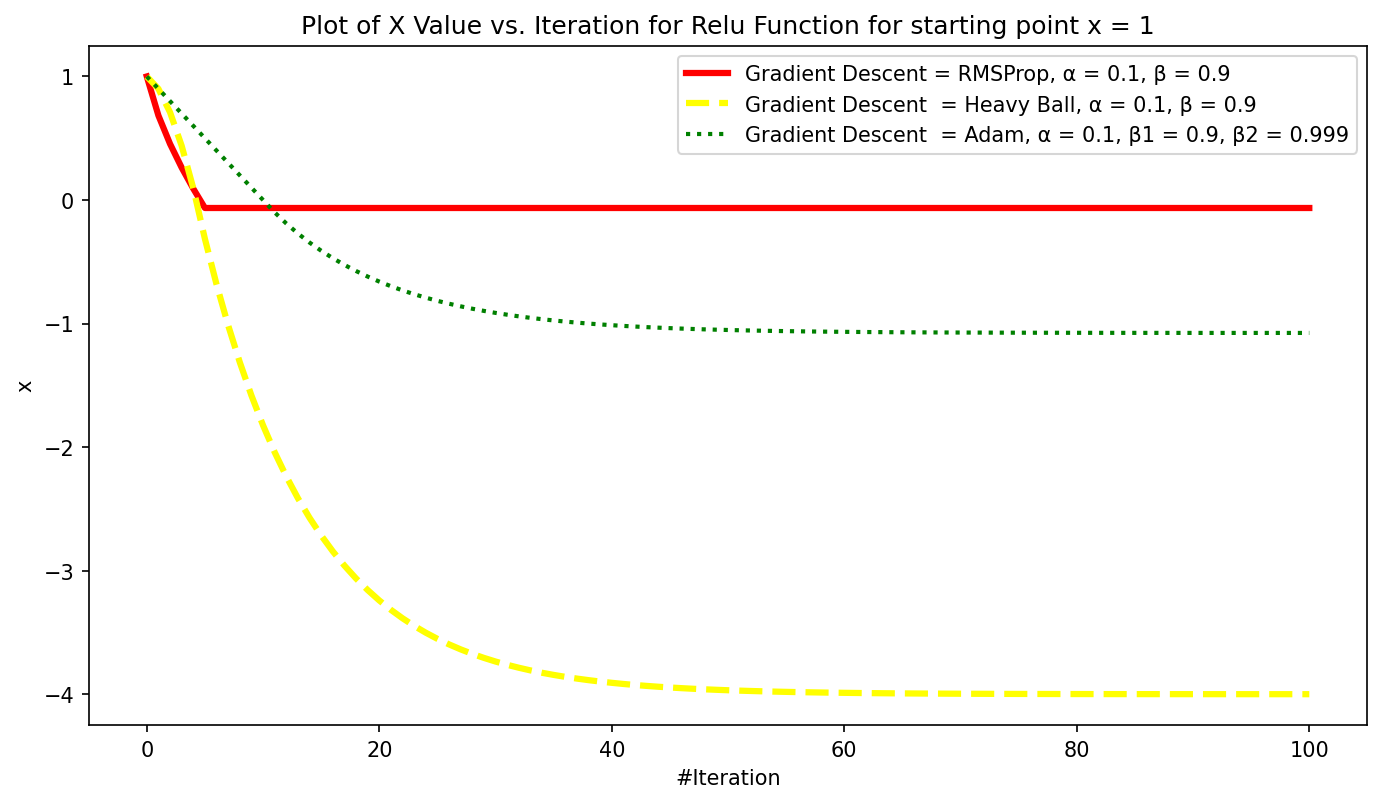

In [10]:
x = 1
plot.figure(figsize=(11, 6), dpi=150)
relu = Function_Relu()

x_values, function_values = execute_rmsprop_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta = 0.9, num_iterations = 100)
plot.plot(x_values, lw = 3, color = 'red', label = 'Gradient Descent = RMSProp, α = 0.1, β = 0.9')

x_values, function_values = execute_heavyball_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta = 0.9, num_iterations = 100)
plot.plot(x_values, lw = 3, color = 'yellow', linestyle='dashed', label = 'Gradient Descent  = Heavy Ball, α = 0.1, β = 0.9')

x_values, function_values = execute_adam_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta_1 = 0.9, beta_2 = 0.999, num_iterations = 100)
plot.plot(x_values, lw = 2, color = 'green', linestyle='dotted', label = 'Gradient Descent  = Adam, α = 0.1, β1 = 0.9, β2 = 0.999')


plot.xlabel('#Iteration')
plot.ylabel('x')
plot.title(f'Plot of X Value vs. Iteration for Relu Function for starting point x = {x}') 

plot.legend()
plot.show()



### Question c(iii): Relu for initial condition x = 100

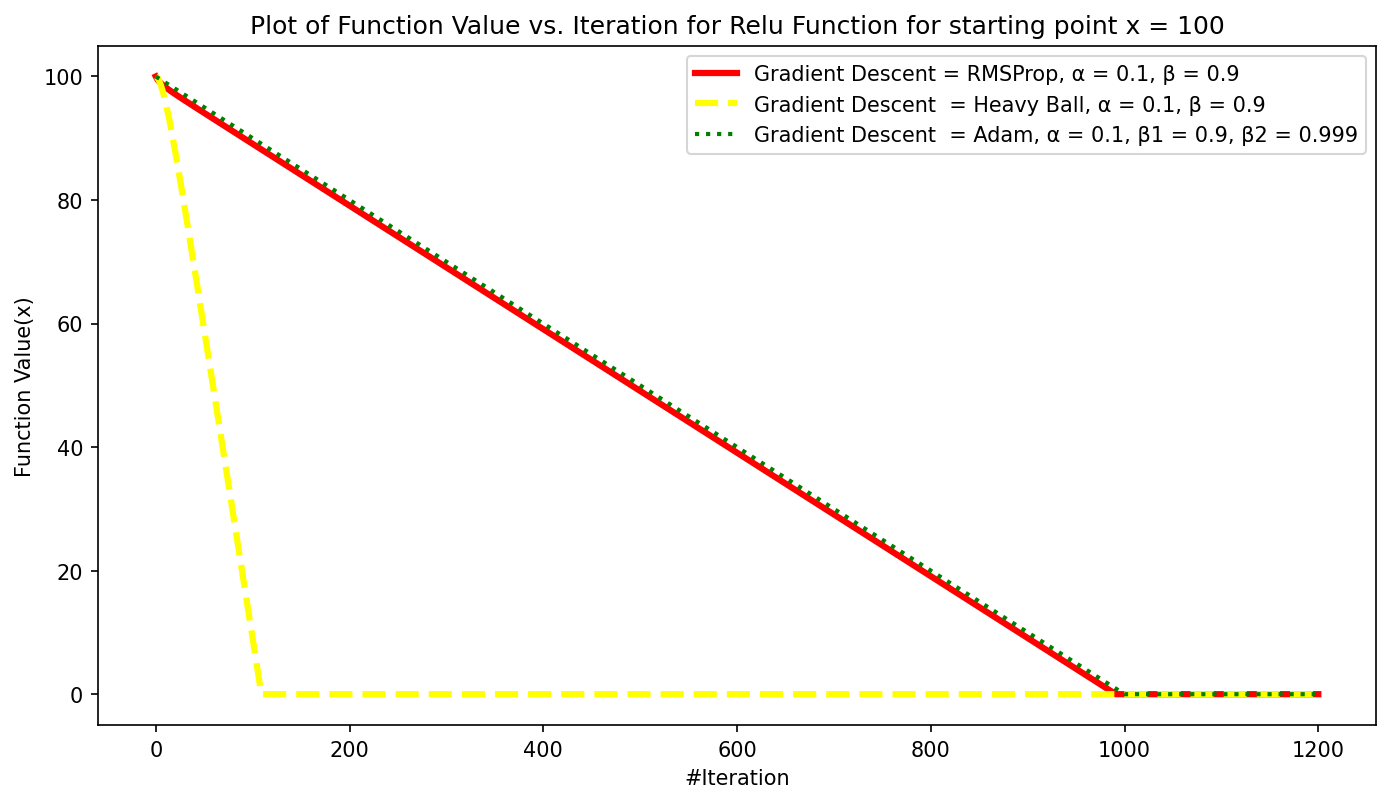

In [11]:
x = 100
plot.figure(figsize=(11, 6), dpi=150)
relu = Function_Relu()

x_values, function_values = execute_rmsprop_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta = 0.9, num_iterations = 1200)
plot.plot(function_values, lw = 3, color = 'red', label = 'Gradient Descent = RMSProp, α = 0.1, β = 0.9')

x_values, function_values = execute_heavyball_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta = 0.9, num_iterations = 1200)
plot.plot(function_values, lw = 3, color = 'yellow', linestyle='dashed', label = 'Gradient Descent  = Heavy Ball, α = 0.1, β = 0.9')

x_values, function_values = execute_adam_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta_1 = 0.9, beta_2 = 0.999, num_iterations = 1200)
plot.plot(function_values, lw = 2, color = 'green', linestyle='dotted', label = 'Gradient Descent  = Adam, α = 0.1, β1 = 0.9, β2 = 0.999')


plot.xlabel('#Iteration')
plot.ylabel('Function Value(x)')
plot.title(f'Plot of Function Value vs. Iteration for Relu Function for starting point x = {x}') 

plot.legend()
plot.show()



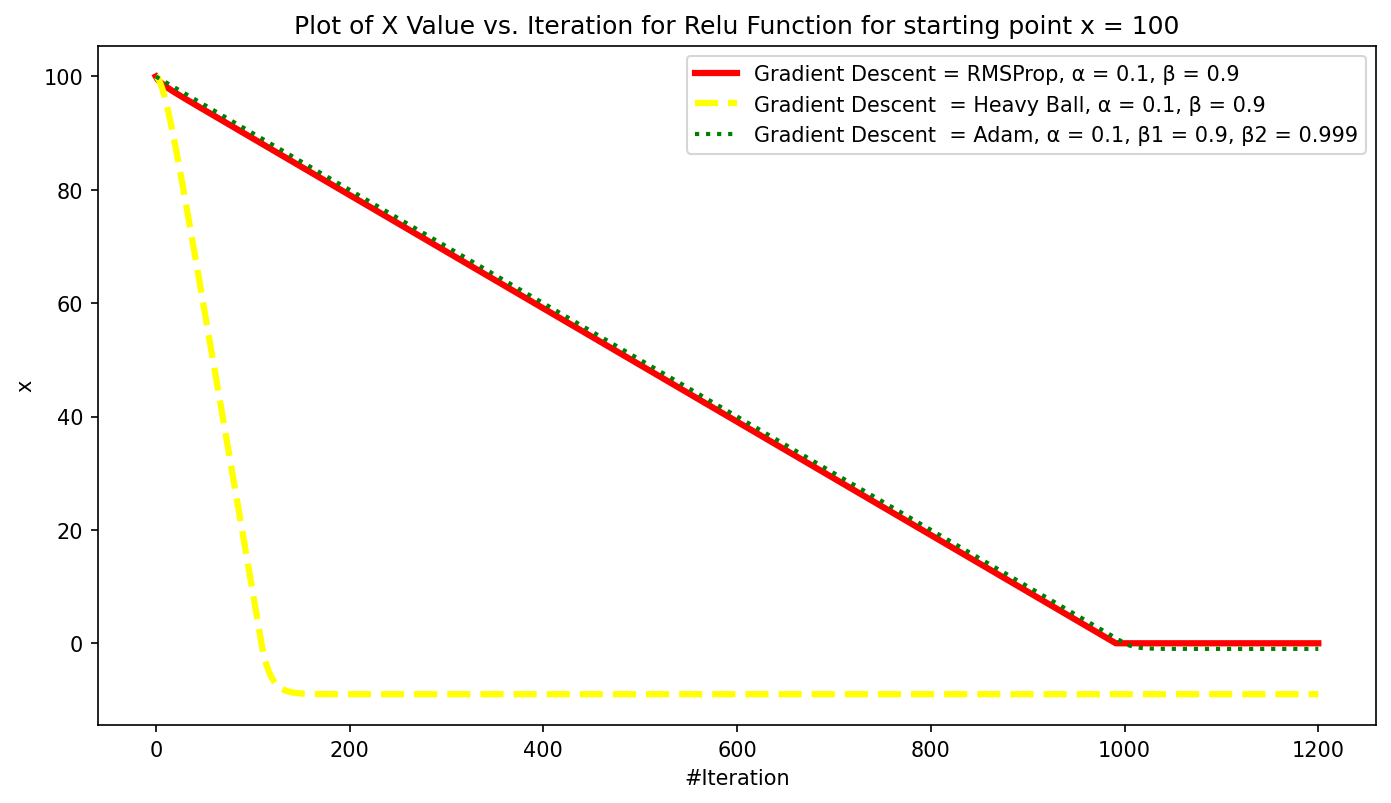

In [12]:
x = 100
plot.figure(figsize=(11, 6), dpi=150)
relu = Function_Relu()

x_values, function_values = execute_rmsprop_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta = 0.9, num_iterations = 1200)
plot.plot(x_values, lw = 3, color = 'red', label = 'Gradient Descent = RMSProp, α = 0.1, β = 0.9')

x_values, function_values = execute_heavyball_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta = 0.9, num_iterations = 1200)
plot.plot(x_values, lw = 3, color = 'yellow', linestyle='dashed', label = 'Gradient Descent  = Heavy Ball, α = 0.1, β = 0.9')

x_values, function_values = execute_adam_gradient_descent(relu, starting_point_x = x, alpha = 0.1, beta_1 = 0.9, beta_2 = 0.999, num_iterations = 1200)
plot.plot(x_values, lw = 2, color = 'green', linestyle='dotted', label = 'Gradient Descent  = Adam, α = 0.1, β1 = 0.9, β2 = 0.999')


plot.xlabel('#Iteration')
plot.ylabel('x')
plot.title(f'Plot of X Value vs. Iteration for Relu Function for starting point x = {x}') 

plot.legend()
plot.show()

